<h4>1. Introduction

<h5>Customer Churn - a term used to define the percentage of customers that stopped using a company's product or service during a certain time frame. Customer churn rate is calculated by dividing the number of customers lost during a certain period by the number of customers a company had during that period.

What we aim to accomplish for this study:

1. Investigate the factors that contribute to customer churn; 
2. Build a model that could predict:
    2.a Whether a customer will stop using the company services/ products;
    2.b Which products prevent customer churn.

Here are the steps in order to accomplish our goals:
1. Make an exploratory data analysis on our data set
2. Visualize our data to make in easier to understand
3. Create a best fitting model based on the data set with high accuracy


<h5>2. Importing and preparing the data

In [61]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv(r"\Data\Customer-Churn-Records.csv")

<IPython.core.display.Javascript object>

In [63]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [64]:
df.shape

(10000, 18)

In [65]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [66]:
# Check for null values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [67]:
# Get unique count for each variable
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [68]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [69]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [70]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [71]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<h5>3. Exploratory Data Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

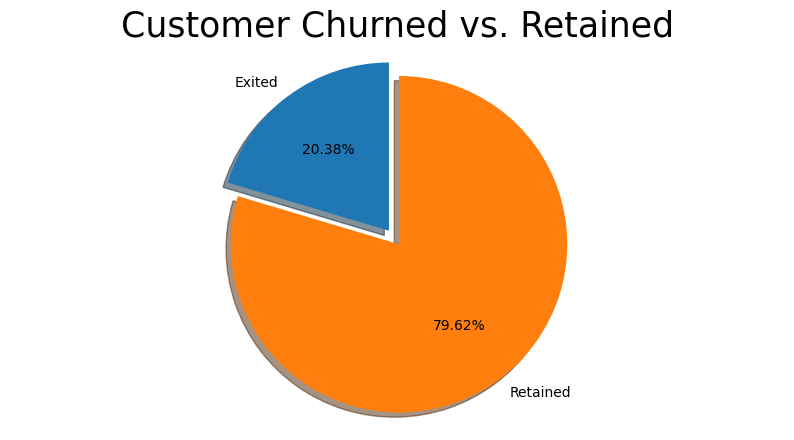

In [72]:
labels = ('Exited', 'Retained')
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize = (10, 5))
ax1.pie(sizes, labels = labels, startangle = 90, shadow = True, explode = explode, autopct = '%1.2f%%')

ax1.axis('equal')
plt.title('Customer Churned vs. Retained', size = 25)
plt.show()

About 20% of the customers have churned. 

Our model could be able to predict that 20% of the bank's customers will churn. This value will be the baseline for our chosen model and it should be able to predict accurately so that the bank could use the model's predictions on their decisions in order to minimize customer churn.

Reviewing the relationship of the 'Exited' column to different variables.

<h3>3.1 Relations based on categorical values

In [73]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [74]:
# Plotting Customers by Geography and Age Group

# Creating age group:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '71+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Aggregating number of customers by age and geography and sort by descending
customers_age_geo = df.groupby(['Age Group', 'Geography']).size().reset_index(name = 'Number of Customers')
customers_age_geo_desc = customers_age_geo.sort_values(by = 'Number of Customers', ascending = False)

customers_age_geo_desc


<IPython.core.display.Javascript object>

,Age Group,Geography,Number of Customers
6,30-40,France,2311
8,30-40,Spain,1118
9,40-50,France,1067
7,30-40,Germany,1022
3,20-30,France,995
10,40-50,Germany,678
11,40-50,Spain,575
5,20-30,Spain,451
4,20-30,Germany,433
12,50-60,France,367


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

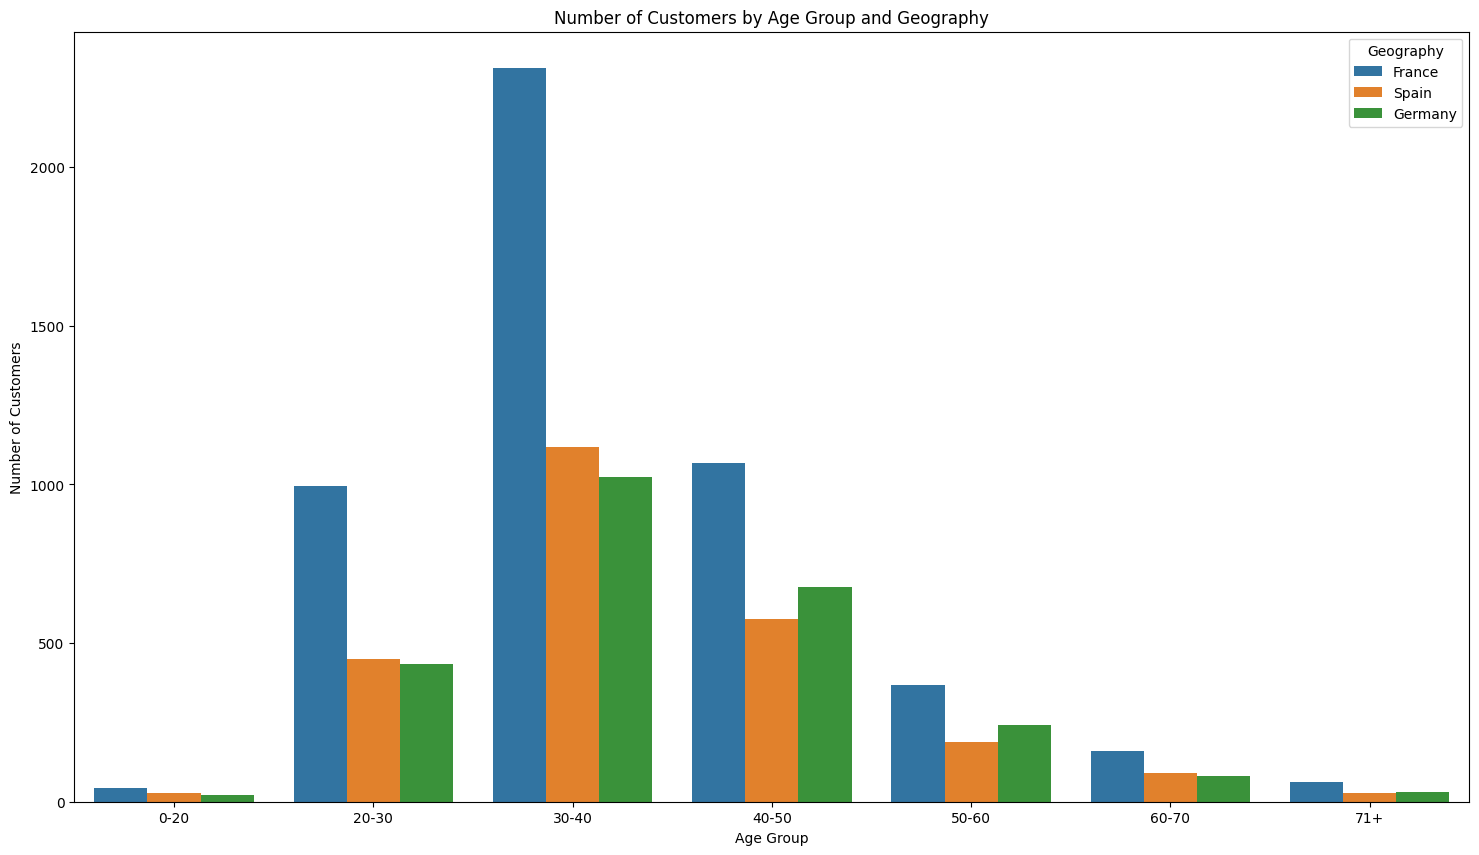

In [75]:
fig, axes = plt.subplots(1, 1, figsize = (18, 10))
sns.barplot(data = customers_age_geo_desc, x = 'Age Group', y = 'Number of Customers', hue = 'Geography')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
axes.title.set_text('Number of Customers by Age Group and Geography')

plt.show

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

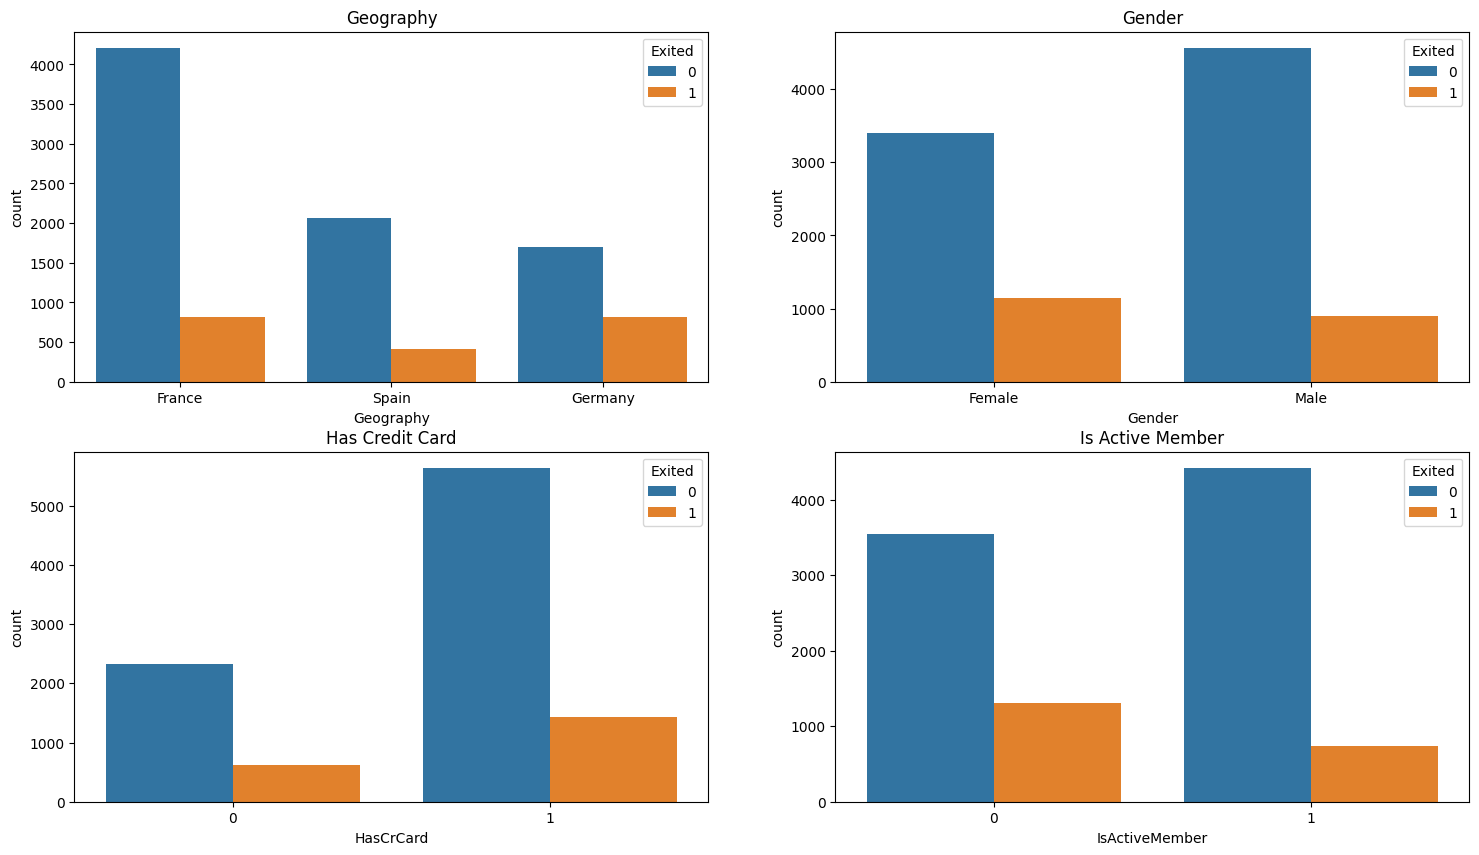

In [76]:
# Plotting the relation between categorical values and churn
fig, axes = plt.subplots(2, 2, figsize = (18, 10))
axes1 = sns.countplot(data = df, x = 'Geography', hue = 'Exited', ax = axes[0][0])
axes2 = sns.countplot(data = df, x = 'Gender', hue = 'Exited', ax = axes[0][1])
axes3 = sns.countplot(data = df, x = 'HasCrCard', hue = 'Exited', ax = axes[1][0])
axes4 = sns.countplot(data = df, x = 'IsActiveMember', hue = 'Exited', ax = axes[1][1])

axes1.title.set_text('Geography')
axes2.title.set_text('Gender')
axes3.title.set_text('Has Credit Card')
axes4.title.set_text('Is Active Member')

Observations:

1. Majority of the bank's customers are from France but it has the least percentage of people who have churned proportional to its customer count. Germany on the other hand, has atleast half of its customers churned. This could be related to the services provided within each locations. 
2. There are more male customers compared to female customers who are using the bank's service. Regardless, female customers are more likely to ditch the bank's services.
3. The majority of customers have credit card(s), and majority of those who churned are also credit card users. This could be a coincidence due to the sheer number of credit card users the bank has.
4. Unactive members make up a large portion of those customers who have churned. But the alarming thing we can see here is the large amount of inactive members the bank currently has. This could mean that the bank needs better services to retain their inactive members and prevent further customer churn.

<h3>3.2 Relations based on continuous data attributes

In [77]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Age Group'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

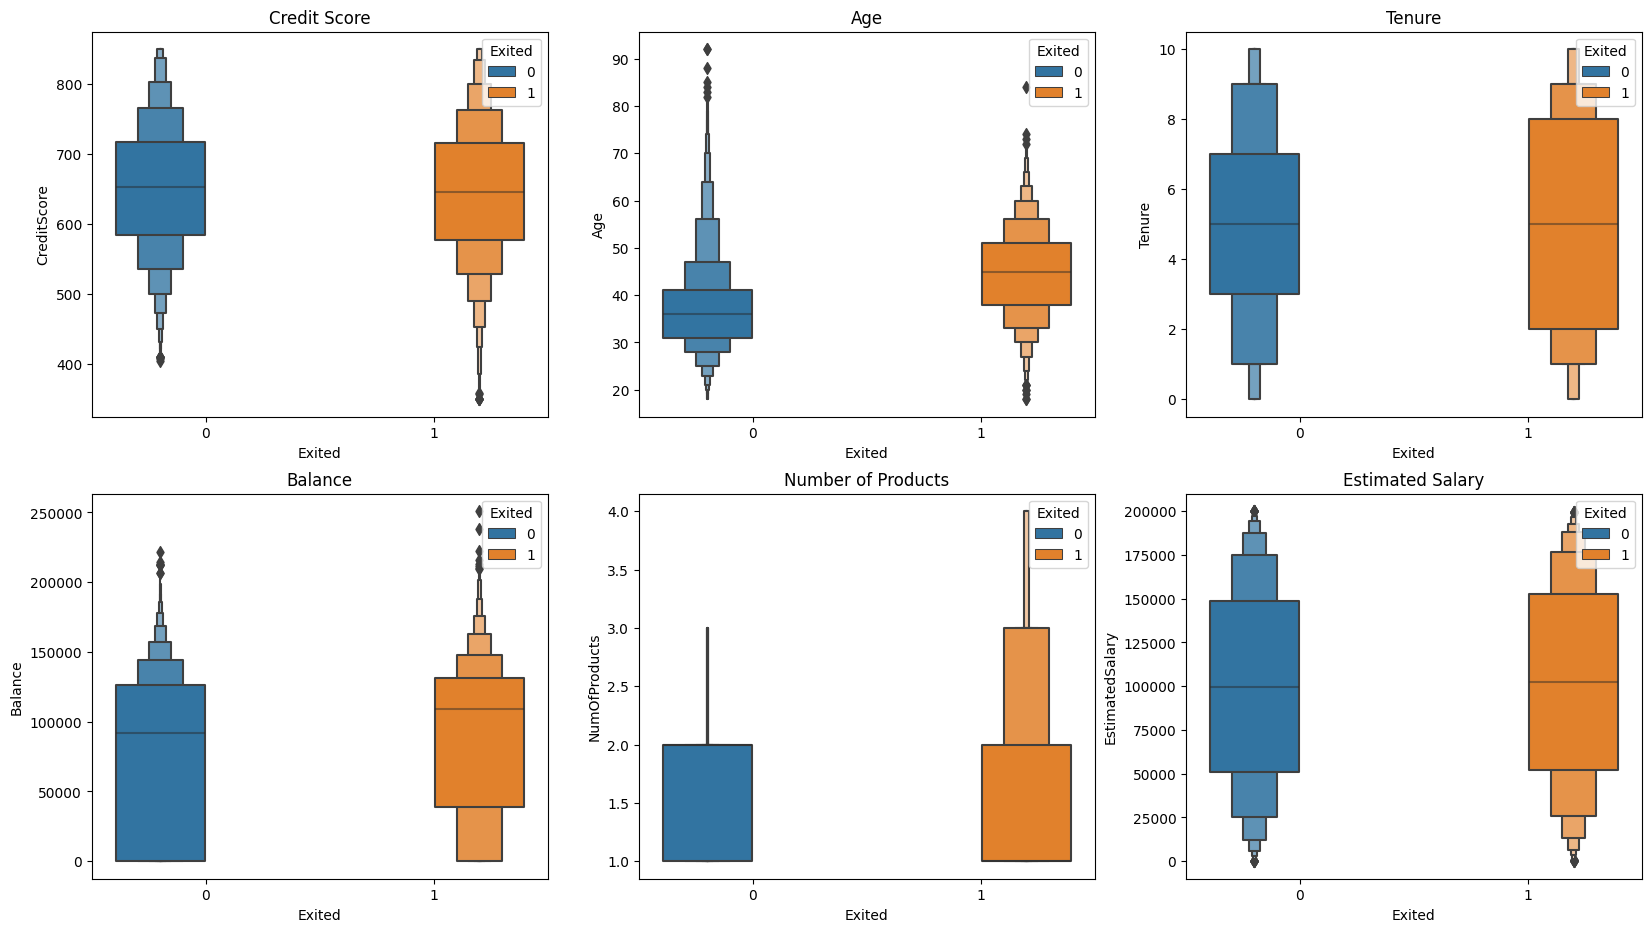

In [78]:
# Relations based on continuous data attributes

fig, axes = plt.subplots(2, 3, figsize = (20, 11))

ax1 = sns.boxenplot(data = df, x = 'Exited', y = 'CreditScore', hue = 'Exited', ax = axes[0][0])
ax2 = sns.boxenplot(data = df, x = 'Exited', y = 'Age', hue = 'Exited', ax = axes[0][1])
ax3 = sns.boxenplot(data = df, x = 'Exited', y = 'Tenure', hue = 'Exited', ax = axes[0][2])
ax4 = sns.boxenplot(data = df, x = 'Exited', y = 'Balance', hue = 'Exited', ax = axes[1][0])
ax5 = sns.boxenplot(data = df, x = 'Exited', y = 'NumOfProducts', hue = 'Exited', ax = axes[1][1])
ax6 = sns.boxenplot(data = df, x = 'Exited', y = 'EstimatedSalary', hue = 'Exited', ax = axes[1][2])

ax1.title.set_text('Credit Score')
ax2.title.set_text('Age')
ax3.title.set_text('Tenure')
ax4.title.set_text('Balance')
ax5.title.set_text('Number of Products')
ax6.title.set_text('Estimated Salary')


<h5>3.3 Churn rate by age and gender

In [79]:
import plotly.express as px

In [80]:
# Calculating Churn Rate by Age and Gender
age_gender = df.groupby(['Age', 'Gender'])['Exited'].mean().reset_index()

fig = px.scatter(data_frame = age_gender, x = 'Age', y = 'Exited', color = ('Gender'), title = 'Age and Gender Churn Rate')

fig.update_layout(xaxis_title = 'Age', yaxis_title = 'Churn Rate')
fig.show()

Observations:

1. Credit score has little significance in retaining customers. The plot tells us that there is little difference in the distribution of credit scores of retained and churned customers.
2. The majority of churned customers are in between the late 30s and early 50s with a median of around 47. Younger ones make up the most of the retained customers with outliers in the ages 80 - 90. Churning may be due to the preferences in the bank's offered services. This could help the bank align their products and services to their target age group.
3. The correlation of tenure and churning is more diverse. With the majority of the customer churn distribution are within the period of 2 to 8 years.
4. Customers tend to churn more as their accounts balance become significantly larger. This would mean that the bank's capital is significantly affected due to churning especially on accounts with bigger balances.
5. The number of products a bank has brings little to no significance in customer churning. 
6. Estimated Salary has also little significance in customer churning.



<h5>3.3 Customer Complain Percentage

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

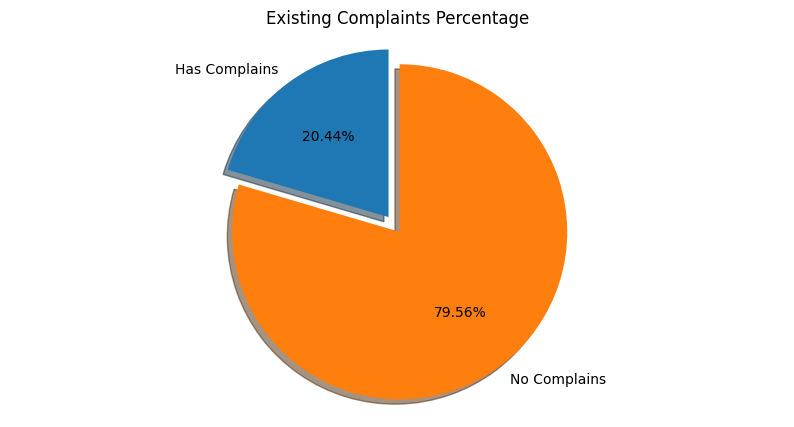

In [81]:
fig, axes = plt.subplots(1,1, figsize = (10, 5))

labels = ('Has Complains', 'No Complains')
sizes = [df.Complain[df['Complain'] == 1].count(), df.Complain[df['Complain'] == 0].count()]
explode = (0, 0.11)

plt.pie(sizes, labels = labels, explode = explode, shadow = True, autopct = '%1.2f%%', startangle = 90)

axes.axis('equal')
plt.title('Existing Complaints Percentage')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0, 0, ''), Text(0, 0, '0.998037')]

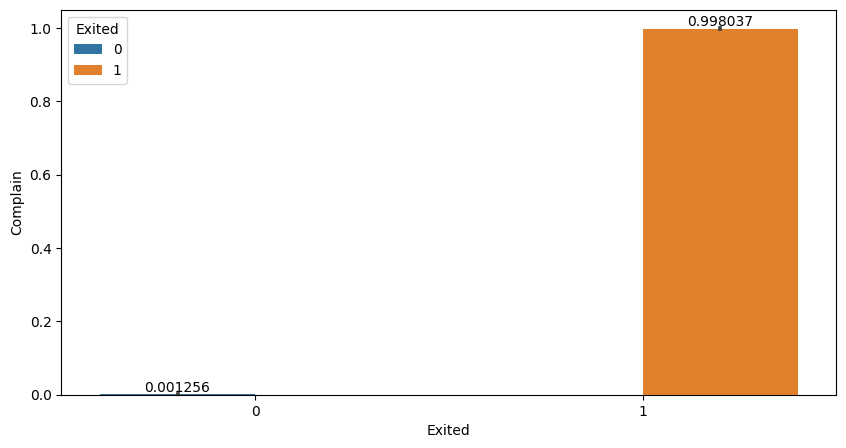

In [82]:
fig, axes = plt.subplots(figsize = (10, 5))

sns.barplot(data = df, y = 'Complain', x = 'Exited', hue = 'Exited')
axes.bar_label(axes.containers[0], fmt='%1f')
axes.bar_label(axes.containers[1], fmt='%1f')

3.4 Correlation Matrix

<h5>3.5 Conclusions

Based on the categorical and continuous data variables:

1. Geographic population has little to do with churning. 
2. Females tend to churn more than males. 
3. Credit card services, inactive members, age, tenure, and balance contribute more on customer churning.
4. Almost all customers who had complaints churned the bank's services.

These factors are more likely because of the customers' preference on the services they get on their associated banks. The more balance they have on their accounts, the more they are concerned with the type of services they get. Banks should focus on their target demographics and include services that are preferred by the customers who are more likely to churn.

<h5>4. Train/Test Split

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [84]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Age Group'],
      dtype='object')

In [85]:
# Dropping Age Group variable since it has little significance in churning and to avoid overfitting.
df = df.drop('Age Group', axis = 1)

In [86]:
# df = df.drop('Geography', axis = 1)
# df.columns

In [87]:
# Importing LabelEncoder to convert categoral values into numerical using fit_transform

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [88]:
df['Geography'] = LE.fit_transform(df['Geography'])
df['Geography'].unique()

array([0, 2, 1])

In [89]:
# df['Age Group'] = LE.fit_transform(df['Age Group'])
# df['Age Group'].unique()

In [90]:
df['Gender'] = LE.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [91]:
df['Card Type'] = LE.fit_transform(df['Card Type'])
df['Card Type'].unique()

array([0, 1, 3, 2])

In [92]:
X = df.drop('Exited', axis = 1) # Independent Variable
y = df['Exited'] # Dependent Variable

print(X.size, y.size)

140000 10000


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42) # Splitting the data into 80/20 ratio

<h5>5. Model Training

In [94]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [95]:
y_pred = model.predict(X_test)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8573333333333333
Precision: 0.7615894039735099
Recall: 0.3924914675767918
F1 Score: 0.5180180180180181
ROC AUC Score: 0.6813327263318922


<h5>I optimized the model by splitting the train/test size into a ratio of 85:15 which gives the highest accuracy result that we have now.

[Sources]:

Data Set - https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

Customer Churn - https://blog.hubspot.com/service/what-is-customer-churn